# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("data-final.csv",sep = "\t")

In [3]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


# Data Preprocessing

In [4]:
df.shape

(1015341, 110)

In [5]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [6]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [7]:
df = df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']]

In [8]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
dtypes: float64(10)
memory usage: 77.5 MB


In [10]:
df.isna().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0


In [13]:
df.drop_duplicates(inplace =True)

In [14]:
df.shape

(438082, 10)

In [15]:
df= df[(df > 0).all(axis=1)]

In [16]:
df.shape

(411690, 10)

In [17]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
count,411690.000000,411690.000000,411690.00000,411690.000000,411690.000000,411690.000000,411690.000000,411690.000000,411690.000000,411690.000000
mean,2.692643,2.807241,3.29701,3.180034,3.342503,2.443076,2.813782,3.381870,3.061886,3.624919
std,1.235159,1.275145,1.18133,1.158858,1.202558,1.229684,1.343066,1.272585,1.319894,1.237631
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000
75%,4.000000,4.000000,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Model creation

In [18]:
from sklearn.cluster import KMeans
wcss = []

In [19]:
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

C:\Users\shrinidhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrinidhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrinidhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrinidhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrinidhi\anaconda3\lib\site-pa

<function matplotlib.pyplot.show(close=None, block=None)>

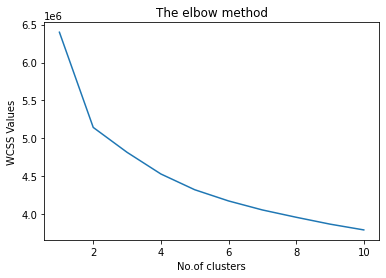

In [20]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS Values')
plt.show

In [21]:
model = KMeans(n_clusters=2, init='k-means++', random_state=0)
k_fit = model.fit(df)

C:\Users\shrinidhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
predictions = k_fit.labels_
df['Clusters'] = predictions

In [23]:
df


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1015313,4.0,1.0,4.0,1.0,5.0,1.0,2.0,3.0,3.0,5.0,1
1015314,3.0,2.0,3.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,1
1015320,4.0,2.0,3.0,2.0,4.0,1.0,5.0,3.0,2.0,2.0,1
1015323,3.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,3.0,3.0,1


In [24]:
df['Clusters'].value_counts()


0    210668
1    201022
Name: Clusters, dtype: int64

In [25]:
df['Personality'] = df['Clusters'].apply(lambda x: 'Extrovert' if x == 0 else 'Introvert')

In [26]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,Clusters,Personality
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1,Introvert
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,0,Extrovert
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,0,Extrovert
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,0,Extrovert
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,0,Extrovert
...,...,...,...,...,...,...,...,...,...,...,...,...
1015313,4.0,1.0,4.0,1.0,5.0,1.0,2.0,3.0,3.0,5.0,1,Introvert
1015314,3.0,2.0,3.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,1,Introvert
1015320,4.0,2.0,3.0,2.0,4.0,1.0,5.0,3.0,2.0,2.0,1,Introvert
1015323,3.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,3.0,3.0,1,Introvert


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
y = df ['Personality']
X = df[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9999028395151692


In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9756491534892759


In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [34]:
#randomforest, decison, ANN

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
predictions = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94     42318
   Introvert       0.94      0.94      0.94     40020

    accuracy                           0.94     82338
   macro avg       0.94      0.94      0.94     82338
weighted avg       0.94      0.94      0.94     82338

[[39827  2491]
 [ 2535 37485]]
Accuracy: 0.9389589254050378


In [ ]:
#silhouette_score_average = silhouette_score(df, kmeans.predict(df))